In [1]:
import keras
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
os.chdir("D:\\Data Science\\Reponse Modeling\\bank-additional\\bank-additional")

os.getcwd()

'# Data Import & Checking NULLS'

data = pd.read_csv("bank-additional-full.csv")

data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:


# NULL # NaN # Inf
pd.isnull(data).sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
data.shape

(41188, 21)

In [6]:
'## Checking for Duplicate Records.'

data.duplicated()

data.duplicated().sum()

12

In [7]:
data = data[~data.duplicated()]

data.shape

(41176, 21)

no     0.887337
yes    0.112663
Name: y, dtype: float64


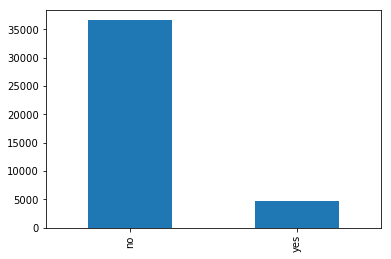

In [8]:
'######################## Exploratory Data Analysis ######################'

## Understanding Target Variable.

print(pd.value_counts(data.y)/len(data.y))  # model biased - 'no')

# Imbalance Classes Problem   # Class Weights . # 80 - # 20

pd.value_counts(data.y).plot(kind='bar')

In [9]:
'''
data.columns
data.age.plot(kind="hist")
np.log(data.age).plot(kind="hist")
a = np.array([-2,-2,-1,-1,0,1,3,4,5,6,7])
pd.Series(a).plot(kind="hist")
pd.Series(np.log(a+3)).plot(kind="hist")
'''


# Exploring Age Variable

counts = pd.crosstab(data.y,data.age)
print(counts)

age  17  18  19  20  21   22   23   24   25   26 ...  85  86  87  88  89  91  \
y                                                ...                           
no    3  16  22  42  73  101  178  376  505  576 ...   8   3   0  13   0   2   
yes   2  12  20  23  29   36   48   86   93  122 ...   7   5   1   9   2   0   

age  92  94  95  98  
y                    
no    1   1   1   0  
yes   3   0   0   2  

[2 rows x 78 columns]


(array([   2.,   12.,   20.,   23.,   29.,    0.,   36.,   48.,   86.,
          93.,    0.,  122.,  114.,  151.,  186.,    0.,  202.,  220.,
         184.,  210.,  184.,    0.,  167.,  154.,  137.,  143.,    0.,
         114.,   84.,  113.,   91.,    0.,   88.,   77.,   91.,   79.,
           0.,   58.,   97.,   55.,   87.,   72.,    0.,   81.,   68.,
          64.,   56.,    0.,   80.,   62.,   58.,   69.,    0.,   58.,
          32.,   25.,   17.,    0.,   27.,   23.,   29.,   11.,   15.,
           0.,   14.,   19.,   21.,   13.,    0.,   13.,   15.,   11.,
          18.,    0.,   13.,   14.,    7.,   18.,    0.,    8.,   11.,
           8.,    3.,    7.,    0.,    5.,    1.,    9.,    2.,    0.,
           0.,    0.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    2.]),
 array([ 17.  ,  17.81,  18.62,  19.43,  20.24,  21.05,  21.86,  22.67,
         23.48,  24.29,  25.1 ,  25.91,  26.72,  27.53,  28.34,  29.15,
         29.96,  30.77,  31.58,  32.39,  33.2 ,  34.01,  34.82,  3

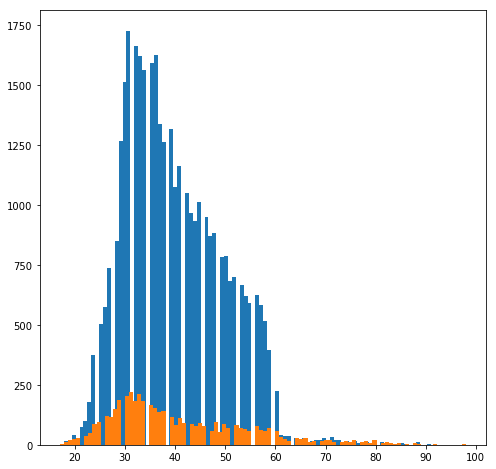

In [10]:
plt.figure(figsize=(8,8))
plt.hist(data.loc[data.y=="no","age"],bins=100)
plt.hist(data.loc[data.y=="yes","age"],bins=100)


In [11]:
data.age = np.clip(data.age,21,60) # numerical variables. 

In [12]:
# Clipping Age values

data.loc[data.age>60,"age"] = 60
data.loc[data.age<21,"age"] = 21

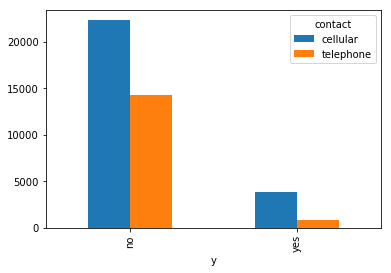

In [13]:

#######################################################################
# Understanding Medium of Contact

counts = pd.crosstab(data.y,data.contact)

counts.plot(kind="bar")

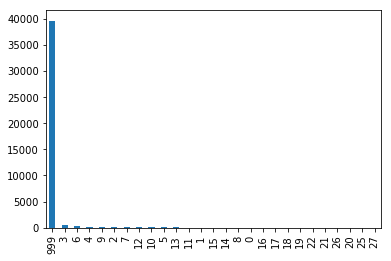

In [14]:
#######################################################################

# number of days past prev.campaign the client was contacted.

counts = pd.value_counts(data.pdays)

counts.plot(kind="bar")


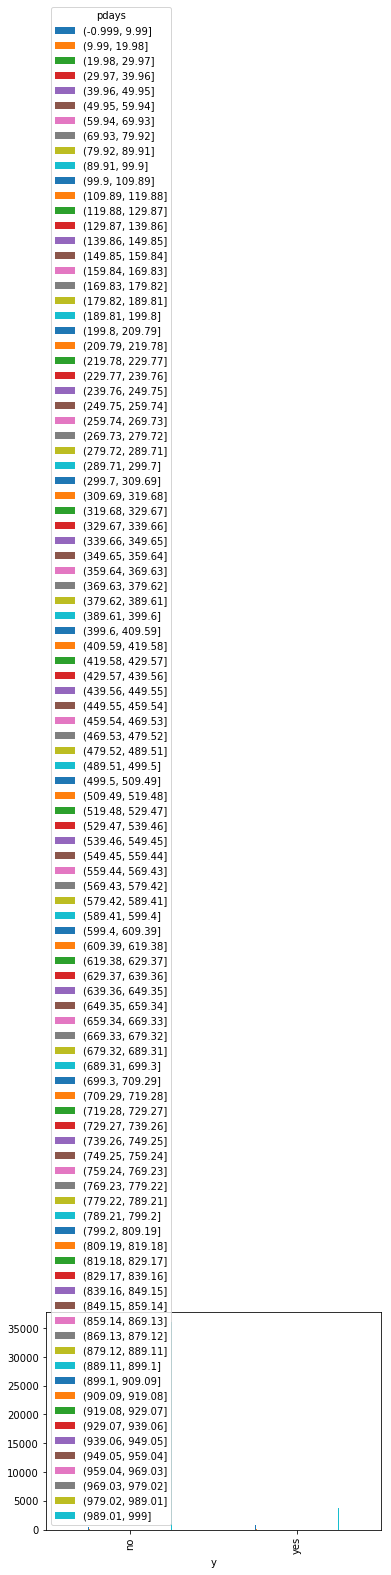

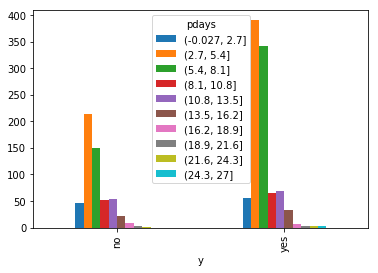

In [15]:
pd.cut(data.pdays,100)

counts = pd.crosstab(data.y,pd.cut(data.pdays,100))
counts.plot(kind="bar")

counts = pd.crosstab(data.loc[data.pdays!=999,"y"],pd.cut(data.loc[data.pdays!=999,"pdays"],10))
counts

counts.plot(kind="bar")

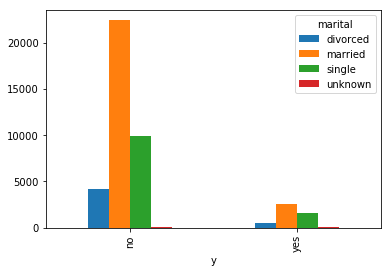

In [16]:
#######################################################################

# Exploring Marial Status

counts = pd.crosstab(data.y,data.marital)

counts.plot(kind="bar")

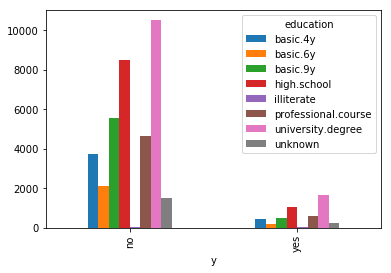

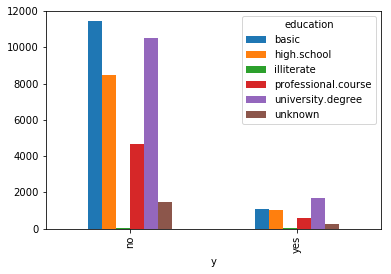

In [17]:
#######################################################################
#Exploring Education 

counts = pd.crosstab(data.y,data.education)

counts.plot(kind="bar")

###

data.loc[data.education.isin(["basic.4y","basic.6y","basic.9y"]),"education"] = "basic"

counts = pd.crosstab(data.y,data.education)

counts

counts.plot(kind="bar")


In [18]:
#######################################################################
import numpy as np

# Calculate information value

def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == "yes")].count()[feature]])
    
    lst

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Events'])
    data = data[data['Events'] > 0]
    data['Non-Events'] = data['All'] - data['Events']
    
    del data['All']
    
    data["% Non-Events"] = data['Non-Events']/data['Non-Events'].sum()
    data["% Events"]     = data['Events']    / data['Events'].sum()
    data['WoE'] = np.log(data['% Events'] / data['% Non-Events'])
    data['IV'] = (data['WoE'] * (data['% Events'] - data['% Non-Events']))

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data,sum(data['IV'])

calc_iv(data,"education","y")

##################################################################


(    Variable                Value  Events  Non-Events  % Non-Events  % Events  \
 0  education                basic    1089       11423      0.312642  0.234749   
 1  education          high.school    1031        8481      0.232121  0.222246   
 5  education           illiterate       4          14      0.000383  0.000862   
 2  education  professional.course     595        4645      0.127131  0.128260   
 4  education    university.degree    1669       10495      0.287243  0.359776   
 3  education              unknown     251        1479      0.040480  0.054106   
 
         WoE        IV  
 0 -0.286542  0.022320  
 1 -0.043473  0.000429  
 5  0.811064  0.000389  
 2  0.008841  0.000010  
 4  0.225152  0.016331  
 3  0.290158  0.003954  , 0.043432396854749193)

In [19]:
cat_columns = data.select_dtypes(['object']).columns

cat_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [20]:
from sklearn import preprocessing

#pip install scikit-plot

le = preprocessing.LabelEncoder()

In [21]:
data[cat_columns] = data[cat_columns].apply(le.fit_transform)

In [22]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,1,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,1,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,1,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,0,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,3,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,5,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,1,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [25]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scikitplot as skplt

In [124]:
X = data.drop(['y'],axis=1)
Y = data.y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
le.fit()

# mapping

In [ ]:
from joblib import dump, load
dump(le, 'filename.joblib') 

In [ ]:
del le

In [ ]:
lee  = load('filename.joblib') 

In [ ]:
lee.transform(data[''])

In [125]:
X_train = X_train.as_matrix()
X_test  = X_test.as_matrix()

In [127]:


mu = X_train.mean(axis=0)
sd = X_train.std(axis=0)

In [128]:
X_train = (X_train-mu)/sd
X_test  = (X_test-mu)/sd

In [84]:
X_test

array([[ 0.43431428, -1.03531036, -1.92557438, ...,  0.88933157,
         0.71528981,  0.33031705],
       [-0.28689529, -0.47902621, -0.28421783, ..., -1.42289017,
        -1.27991838, -0.94327758],
       [-0.38992523, -0.75716829, -0.28421783, ..., -0.27758408,
         0.77008738,  0.84446678],
       ..., 
       [-0.08083541, -0.75716829, -0.28421783, ...,  0.88933157,
         0.7112521 ,  0.33031705],
       [-0.08083541, -1.03531036, -1.92557438, ...,  0.95416022,
         0.7741251 ,  0.84446678],
       [-1.1111348 ,  0.91168415, -0.28421783, ..., -1.22840423,
        -1.32087235, -0.94327758]])

In [56]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop,Adam

In [39]:
X_train.shape

(28823, 20)

In [ ]:
callbacks. 



# earlyStopping

In [108]:
dict(1/pd.value_counts(y_train))

{0: 3.9035053478023267e-05, 1: 0.00031201248049921997}

In [129]:
model = Sequential()

model.add(Dense(5, input_shape=(20, ) , activation = "relu"))
#model.add(Dense(4, activation = "relu"))
#model.add(Dense(2, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train,y_train,epochs = 40  , batch_size = 256 , class_weight = dict(1/pd.value_counts(y_train)),
                    validation_data =[X_test,y_test] )




Train on 28823 samples, validate on 12353 samples
Epoch 1/40
28823/28823 [==============================] - 0s - loss: 5.0848e-05 - acc: 0.3616 - val_loss: 0.8143 - val_acc: 0.4777
Epoch 2/40
28823/28823 [==============================] - 0s - loss: 3.8878e-05 - acc: 0.5851 - val_loss: 0.6324 - val_acc: 0.6908
Epoch 3/40
28823/28823 [==============================] - 0s - loss: 3.4025e-05 - acc: 0.7381 - val_loss: 0.5578 - val_acc: 0.7854
Epoch 4/40
28823/28823 [==============================] - 0s - loss: 3.1340e-05 - acc: 0.8018 - val_loss: 0.5116 - val_acc: 0.8209
Epoch 5/40
28823/28823 [==============================] - 0s - loss: 2.9460e-05 - acc: 0.8247 - val_loss: 0.4762 - val_acc: 0.8353
Epoch 6/40
28823/28823 [==============================] - 0s - loss: 2.8061e-05 - acc: 0.8372 - val_loss: 0.4575 - val_acc: 0.8374
Epoch 7/40
28823/28823 [==============================] - 0s - loss: 2.7046e-05 - acc: 0.8392 - val_loss: 0.4437 - val_acc: 0.8406
Epoch 8/40
28823/28823 [=========

dict_keys(['loss', 'val_acc', 'val_loss', 'acc'])


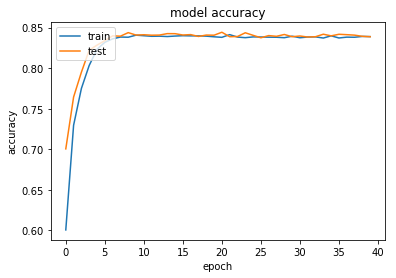

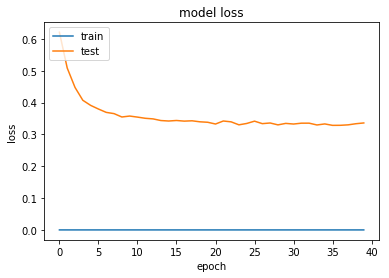

In [112]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [86]:
model.save("response_model.hdf5")
model.save("response_model.h5")

In [87]:
pwd

'D:\\Data Science\\Reponse Modeling\\bank-additional\\bank-additional'

In [89]:
from keras.models import load_model

In [90]:
model2 = load_model("response_model.h5")

In [91]:
model2

In [92]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 8)                 168       
_________________________________________________________________
dense_75 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 3         
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________


In [113]:
final_prob = model.predict(X_test)  # P(1)

In [114]:
np.concatenate([1-final_prob , final_prob],axis=1)

array([[ 1.  ,  0.  ],
       [ 0.04,  0.96],
       [ 0.48,  0.52],
       ..., 
       [ 0.87,  0.13],
       [ 0.99,  0.01],
       [ 0.9 ,  0.1 ]], dtype=float32)

In [115]:
final_preds = np.where(final_prob >0.5,1,0)

In [116]:
final_preds

array([[0],
       [1],
       [1],
       ..., 
       [0],
       [0],
       [0]])

In [ ]:
dict(1/y_train.value_counts())

In [ ]:
pwd

In [ ]:
model.save("responsemodel.h5")

In [ ]:
from keras.models import load_model

new_model = load_model("responsemodel.h5")


In [ ]:
new_model.summary()

In [ ]:
new_model.predict(X_test)

In [ ]:
del model

In [ ]:
model = Sequential()
model.add(Dense(4,input_shape=(20,),activation="relu"))
#model.add(Dense(16,activation="relu"))
#model.add(Dense(8,activation="relu"))
#model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


model.compile(RMSprop(lr=0.001), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train,y_train.as_matrix(),epochs=30,
                    verbose=1,batch_size=512,validation_data=[X_test,y_test],class_weight=dict(1/y_train.value_counts()))

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [119]:
predicted_probas = model.predict_proba(X_test,batch_size=128)

 9600/12353 [======================>.......] - ETA: 0s

In [120]:
predicted_probas

array([[ 0.  ],
       [ 0.96],
       [ 0.52],
       ..., 
       [ 0.13],
       [ 0.01],
       [ 0.1 ]], dtype=float32)

In [122]:
predicted_probas = np.concatenate([1-predicted_probas,predicted_probas],axis=1)

In [ ]:
final_preds = np.argmax(predicted_probas,axis=1)

print("Accuracy",sum(final_preds.ravel() == y_test.ravel())/len(y_test))

In [102]:
print("Accuracy",sum(final_preds.ravel() == y_test.ravel())/len(y_test))

Accuracy 0.908848053105


Confusion matrix, without normalization
[[9045  118]
 [1874 1316]]
Normalized confusion matrix
[[ 0.99  0.01]
 [ 0.59  0.41]]


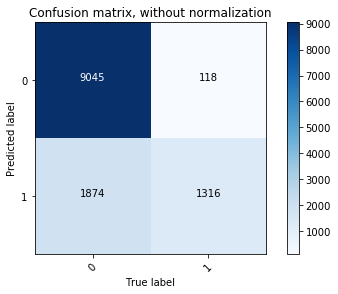

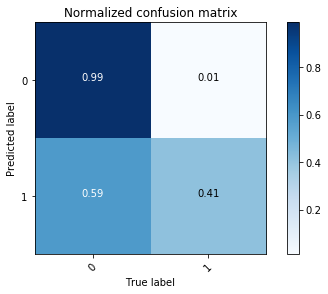

In [117]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')

len(y_test)
# Compute confusion matrix
np.set_printoptions(precision=2)
cnf_matrix = confusion_matrix(final_preds,y_test)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['0','1']),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=np.array(['0','1']),
                      normalize=True,
                      title='Normalized confusion matrix')

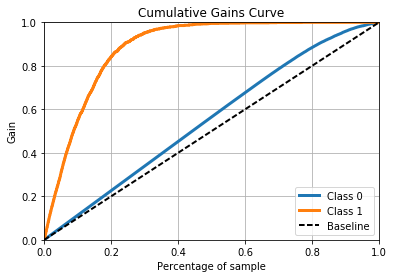

In [123]:
skplt.metrics.plot_cumulative_gain(y_test, predicted_probas)
plt.show()